In [28]:
%autoreload 2
import sqra
import matplotlib.pyplot as plt
import numpy as np
import ode

In [323]:
nx = 4
ny = 1
N = nx*ny
torus = True
T = 5

U = np.zeros((ny,nx))

U[:,0] = 4
#U[:,2] = 1
#U[0,0]=1

s = sqra.Sqra(U, torus=True)



0.33941950347493194


In [333]:
p = ode.Problem(s, [T], verbose=True)

hp:0.33941950347493194, cost:0.0, obj:0.33941950347493194


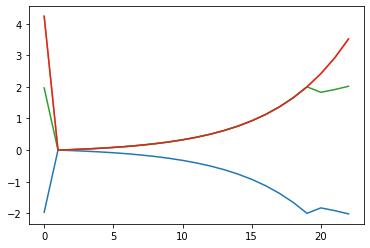

In [340]:
plt.plot(p.histx)

In [336]:
p.optim.run(10)

hp:0.5319544084352996, cost:2.4737813900799998e-05, obj:0.5319296706213988
hp:0.5805285287210995, cost:3.0310376680959996e-05, obj:0.5804982183444185
hp:0.6395209410689714, cost:3.6997452017152e-05, obj:0.6394839436169543
hp:0.7092773507407357, cost:4.502194242058239e-05, obj:0.7092323287983151
hp:0.7875977829639254, cost:5.465133090469887e-05, obj:0.7875431316330207
hp:0.8674376705849838, cost:6.620659708563865e-05, obj:0.8673714639878981
hp:0.9351977797463428, cost:8.007291650276637e-05, obj:0.93511770682984
hp:0.8968388892129115, cost:8.492612829876108e-05, obj:0.8967539630846127
hp:0.8916625311794043, cost:9.664316820623399e-05, obj:0.8915658880111981
hp:0.8591409182316102, cost:0.00011070361609520151, obj:0.859030214615515


In [324]:


sflat = sqra.Sqra(np.zeros((ny,nx)), torus=torus)
pf = ode.Problem(sflat, [T])

print(pf.hpmin)

0.9354752292327132


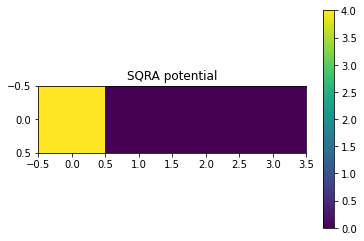

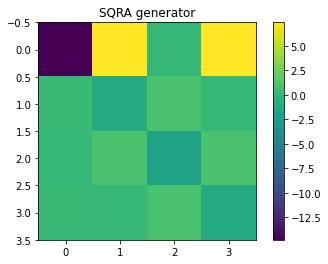

In [325]:
s.plot()

In [326]:
from copy import copy

In [322]:
import ode
import optimizers
adam = optimizers.Adam(h=0.1, beta1=0.8, beta2=.95)
rprop = optimizers.Rprop()
momentum = optimizers.Momentum(h=0.1, alpha=0.8)
rms = optimizers.RMSProp(h=0.1, gamma=0.9)
nm = optimizers.ScipyOpt(method='Nelder-Mead')

optims = [adam, rprop, momentum, rms, nm]

problems = []

for opt in optims:
    for maxsubder in [1,10]:


        p = ode.Problem(s, [5], g0=1, penalty=1, optimizer=copy(opt), maxsubder=maxsubder)
        problems.append(p)



In [34]:
for p in problems:
    print(p.optim, p.maxsubder)
    %time p.optim.run(200)


<optimizers.Adam object at 0x11bffd1f0> 1
CPU times: user 3min 45s, sys: 1.1 s, total: 3min 46s
Wall time: 3min 48s
<optimizers.Adam object at 0x11c0f71c0> 10
CPU times: user 8min 27s, sys: 2.26 s, total: 8min 29s
Wall time: 8min 33s
<optimizers.Rprop object at 0x11d53f6a0> 1
CPU times: user 3min 51s, sys: 1.21 s, total: 3min 52s
Wall time: 3min 55s
<optimizers.Rprop object at 0x11d53f460> 10
CPU times: user 8min 42s, sys: 2.49 s, total: 8min 44s
Wall time: 8min 50s
<optimizers.Momentum object at 0x11d53f880> 1
CPU times: user 3min 46s, sys: 1.12 s, total: 3min 47s
Wall time: 3min 49s
<optimizers.Momentum object at 0x11d53f9a0> 10
CPU times: user 8min 23s, sys: 2.32 s, total: 8min 26s
Wall time: 8min 29s
<optimizers.RMSProp object at 0x11d53ffd0> 1
CPU times: user 3min 48s, sys: 1.15 s, total: 3min 49s
Wall time: 3min 51s
<optimizers.RMSProp object at 0x11d1f8310> 10
CPU times: user 8min 25s, sys: 2.19 s, total: 8min 27s
Wall time: 8min 31s
<optimizers.ScipyOpt object at 0x11d1f8220> 1

optimizer:  <optimizers.Adam object at 0x11bffd1f0> maxsubder 1
hp:0.20064150672506756, cost:0.35766248620299984, obj:-0.15702097947793228


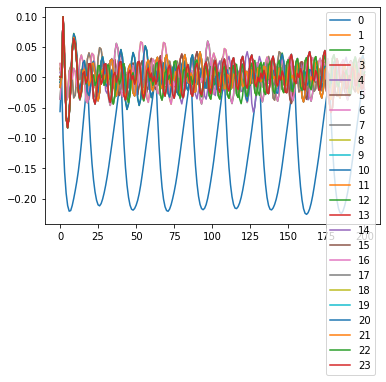

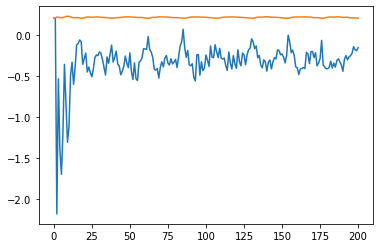

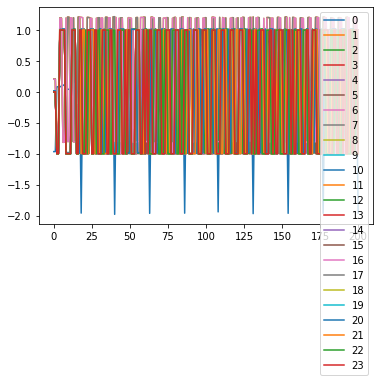

optimizer:  <optimizers.Adam object at 0x11c0f71c0> maxsubder 10
hp:0.20586925548533475, cost:0.6249231658560672, obj:-0.4190539103707325


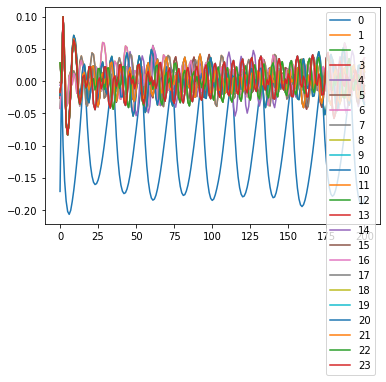

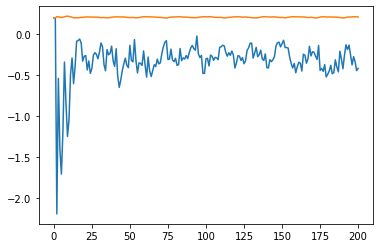

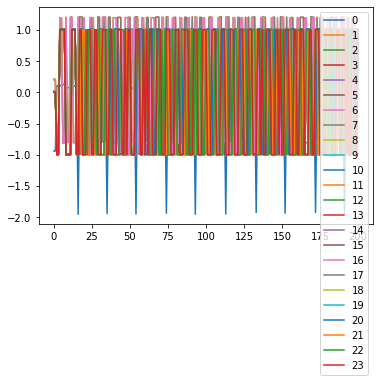

optimizer:  <optimizers.Rprop object at 0x11d53f6a0> maxsubder 1
hp:0.2012306796011398, cost:1.0415727484909855e-33, obj:0.2012306796011398


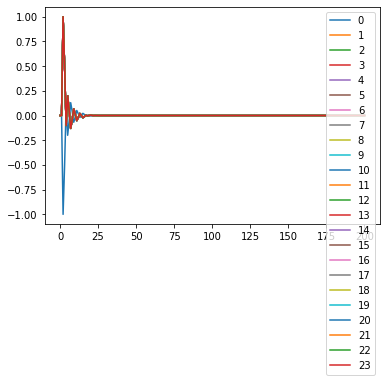

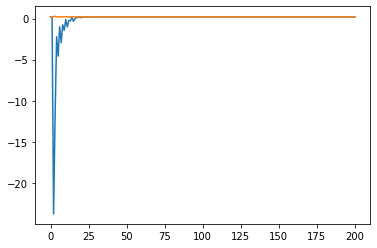

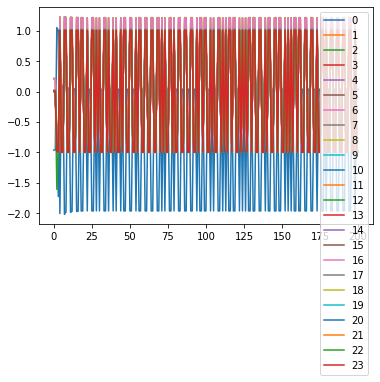

optimizer:  <optimizers.Rprop object at 0x11d53f460> maxsubder 10
hp:0.1960847236972973, cost:1.0415727484909855e-33, obj:0.1960847236972973


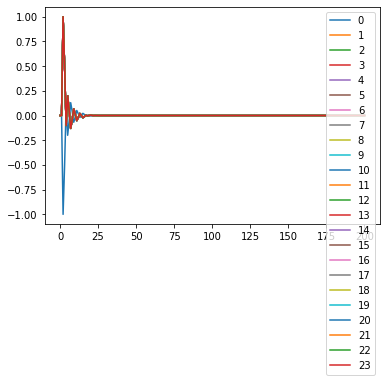

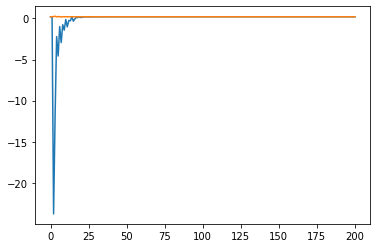

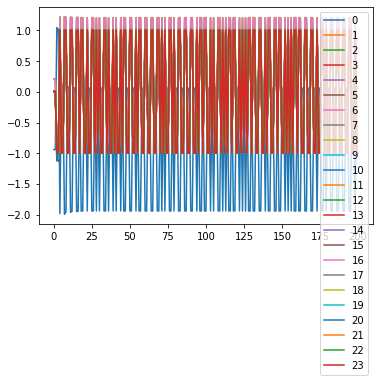

optimizer:  <optimizers.Momentum object at 0x11d53f880> maxsubder 1
hp:0.21350887234521287, cost:2.0843449781363947, obj:-1.8708361057911818


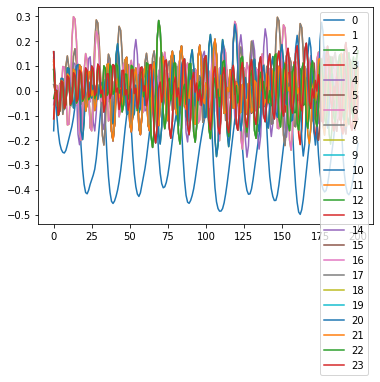

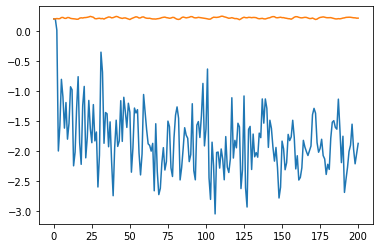

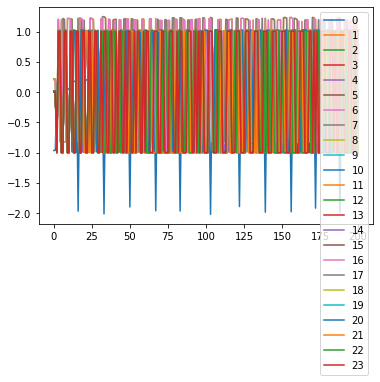

optimizer:  <optimizers.Momentum object at 0x11d53f9a0> maxsubder 10
hp:0.2017836693940475, cost:2.3080172002125274, obj:-2.10623353081848


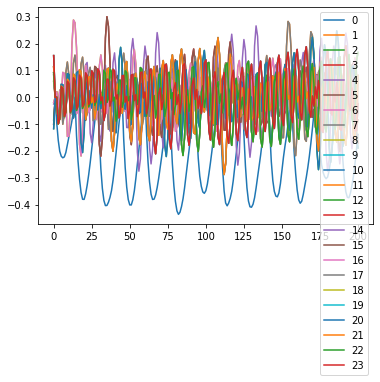

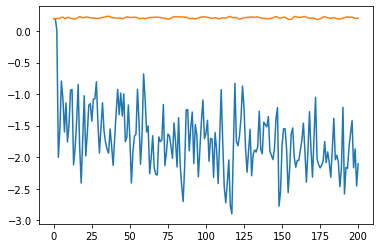

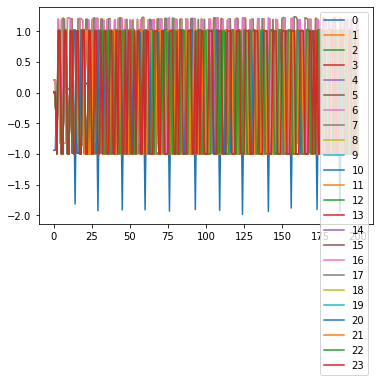

optimizer:  <optimizers.RMSProp object at 0x11d53ffd0> maxsubder 1
hp:0.21309233903673264, cost:1.1401156582239627, obj:-0.92702331918723


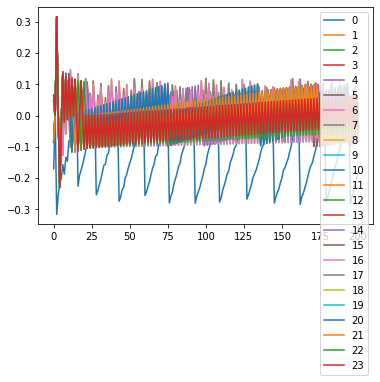

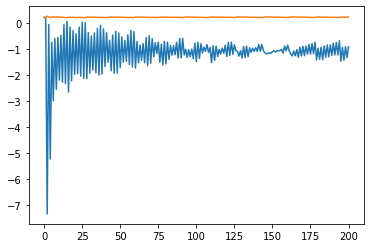

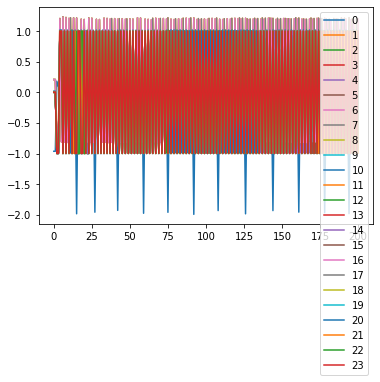

optimizer:  <optimizers.RMSProp object at 0x11d1f8310> maxsubder 10
hp:0.205022649187674, cost:1.017590394976442, obj:-0.812567745788768


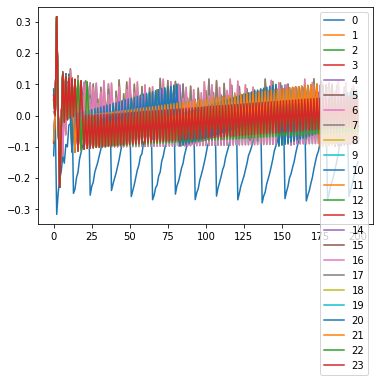

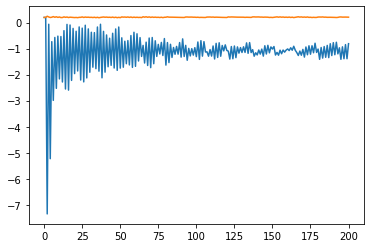

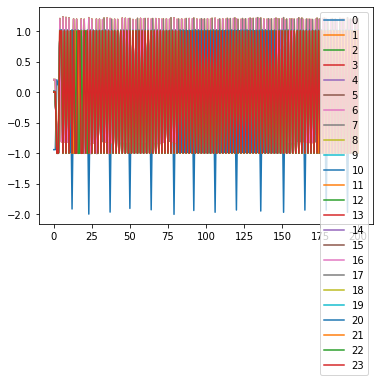

optimizer:  <optimizers.ScipyOpt object at 0x11d1f8220> maxsubder 1
hp:0.2012314465400908, cost:0.0002232551044415612, obj:0.20100819143564924


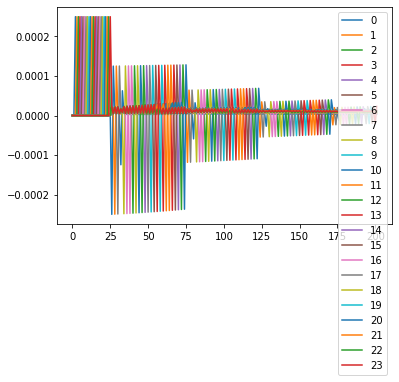

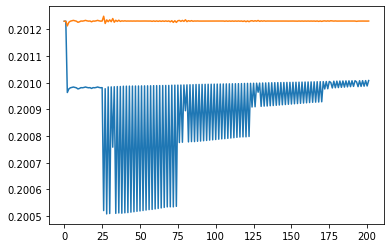

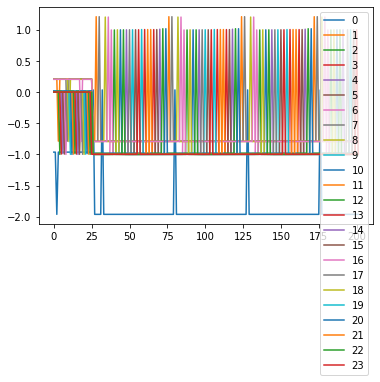

optimizer:  <optimizers.ScipyOpt object at 0x11d1f8340> maxsubder 10
hp:0.196085496284202, cost:0.00022327570098758375, obj:0.1958622205832144


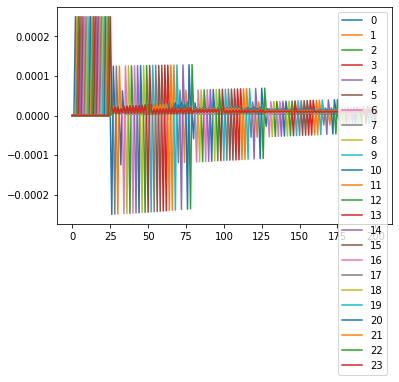

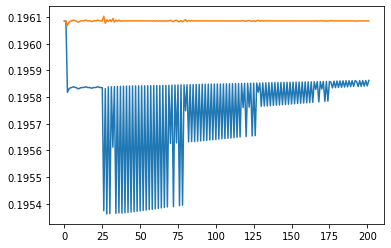

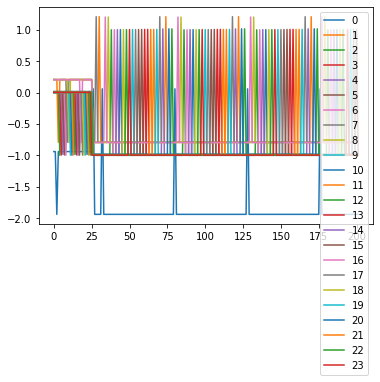

In [35]:
for p in problems:
    print("optimizer: ",p.optim, "maxsubder",p.maxsubder)
    p.print_status()
    p.plot_xhist()
    p.plot_objhist()
    p.plot_derivatives()

In [38]:
for p in problems:
    print("optimizer: ",p.optim, "maxsubder",p.maxsubder)
    print(np.min(p.hp.finite_time_hitting_probs()))
    print(p.obj)
    print(p.cost)
    print()

optimizer:  <optimizers.Adam object at 0x11bffd1f0> maxsubder 1
0.2006415067250676
-0.15702097947793228
0.35766248620299984

optimizer:  <optimizers.Adam object at 0x11c0f71c0> maxsubder 10
0.2112009385174125
-0.4190539103707325
0.6249231658560672

optimizer:  <optimizers.Rprop object at 0x11d53f6a0> maxsubder 1
0.20123067960113983
0.2012306796011398
1.0415727484909855e-33

optimizer:  <optimizers.Rprop object at 0x11d53f460> maxsubder 10
0.20123067960113983
0.1960847236972973
1.0415727484909855e-33

optimizer:  <optimizers.Momentum object at 0x11d53f880> maxsubder 1
0.2135088723452129
-1.8708361057911818
2.0843449781363947

optimizer:  <optimizers.Momentum object at 0x11d53f9a0> maxsubder 10
0.20646014626942213
-2.10623353081848
2.3080172002125274

optimizer:  <optimizers.RMSProp object at 0x11d53ffd0> maxsubder 1
0.21309233903673266
-0.92702331918723
1.1401156582239627

optimizer:  <optimizers.RMSProp object at 0x11d1f8310> maxsubder 10
0.21038402835672487
-0.812567745788768
1.017590

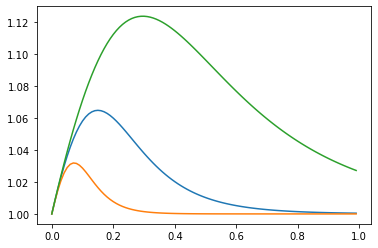

In [290]:
xr = np.arange(0,1,.01)
for i in [13,26,7]:
    plt.plot(xr, [ode.softmin(np.array([1, 1+x, 1+x, 1+x, 1+x, 1+x]), i) for x in xr])
plt.show()

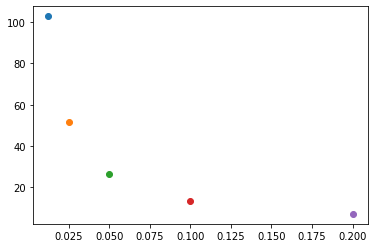

In [271]:
import scipy

r= []
for i in [0.0125, 0.025, 0.05, 0.1, 0.2]:
    x = scipy.optimize.root_scalar(lambda x: ode.dsoftmin([1,1+i], x)[1], bracket=[4,200])
    r.append(x.root)
    plt.scatter(i, x.root)
plt.show()

In [255]:
x = scipy.optimize.root_scalar(lambda x: ode.dsoftmin([1,1.05], x)[1], bracket=[4,30])

In [272]:
r

[102.9150722163916,
 51.77518328941814,
 26.203325291577027,
 13.413725012226452,
 7.012141434300565]